<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_3_1_exercice_re%CC%81gression_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans un premier temps, on va importer les données. C'est la base des prix immobiliers que vous connaissez déjà.


In [ ]:
import pandas as pd
housing=pd.read_csv("https://dataks.bitbucket.io/ml/houses.csv")

Dans un premier temps, vous pouvez refaire une exploration des données pour s'assurer que la base n'a changé.

In [ ]:
# Explorer la base de données
housing.describe()
housing.info()
housing["airco"].value_counts
housing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     546 non-null    int64 
 1   lotsize   546 non-null    int64 
 2   bedrooms  546 non-null    int64 
 3   bathrms   546 non-null    int64 
 4   stories   546 non-null    int64 
 5   driveway  546 non-null    object
 6   recroom   546 non-null    object
 7   fullbase  546 non-null    object
 8   gashw     546 non-null    object
 9   airco     546 non-null    object
 10  garagepl  546 non-null    int64 
 11  prefarea  546 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.3+ KB


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,420000,585,3,1,2,yes,no,yes,no,no,1,no
1,385000,400,2,1,1,yes,no,no,no,no,0,no
2,495000,306,3,1,1,yes,no,no,no,no,0,no
3,605000,665,3,1,2,yes,yes,no,no,no,0,no
4,610000,636,2,1,1,yes,no,no,no,no,0,no


*Essayez de ne pas faire du copier-coller et faire l'exercice vous-même devant ce notebook.*


**Question** : créer un modèle linéaire simple, pour prédire le prix en fonction du nombre de chambres (`bedrooms`).

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


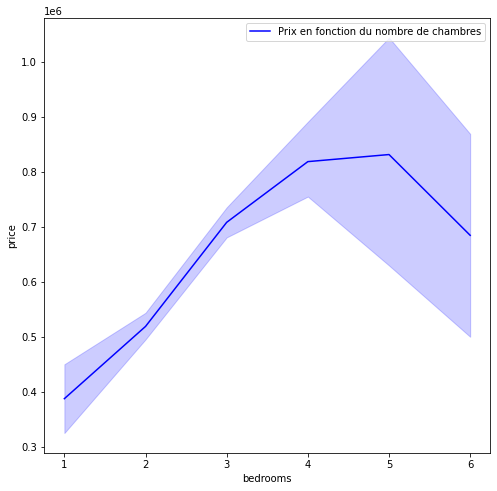

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x=housing["bedrooms"], y=housing["price"], color='b', ax=ax)
ax.legend(['Prix en fonction du nombre de chambres'], facecolor='w')
plt.show()


**Question**: visualiser la droite qui représente le modèle, sur un graphique de type nuage de points (prix en fonction du nombre de chambres).

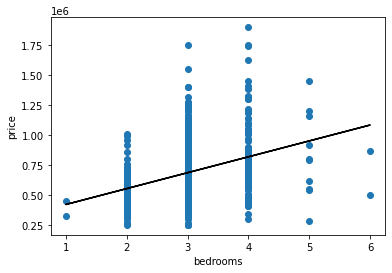

In [ ]:
# importer le package qui permet de créer le graphique
x = housing[["bedrooms"]]
y = housing[["price"]]
# importer le package qui contient le modèle linéaire
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# créer le modèle
model = LinearRegression()
# entraîner le modèle
model.fit(x,y)

plt.scatter(x,y)
plt.plot(x,model.predict(x),color = "black")
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

**Question**: examiner les paramètres du modèle. Pour vérifier si vous avez trouvé les bonnes réponses, vous pouvez faire le quiz.

In [ ]:
# afficher les attributs du modèle
model.predict([[400]])
model.coef_ # c'est la pente
model.intercept_ #la donnée à l'origine
model.coef_ * 400 + model.intercept_ #fonction ax+b

array([[53367654.67333329]])

**Question** En théorie, on ne peut pas avoir un appartement de 1,5 chambres. Mais si on met quand meme nombre réel dans le modèle, qu'est-ce qui se passe?

In [ ]:
model.coef_ * 400.50 + model.intercept_ #fonction ax+b

array([[53434004.57376654]])

**Question** Créer un vecteur dans lequel, on trouve les estimations pour des appartements de 1, 2, 3, 4, 5 et 6 chambres.

Vous pouvez utiliser la méthode `predict` ou les coefficients.

(Vous pouvez faire une boucle, mais c'est plus lent, c'est à éviter.)


In [ ]:
print("1 chambre",model.coef_ * 1 + model.intercept_) #fonction ax+b
print("2 chambres",model.coef_ * 2 + model.intercept_) #fonction ax+b
print("3 chambres",model.coef_ * 3 + model.intercept_) #fonction ax+b
print("4 chambres",model.coef_ * 4 + model.intercept_) #fonction ax+b
print("5 chambres",model.coef_ * 5 + model.intercept_) #fonction ax+b
print("6 chambres",model.coef_ * 6 + model.intercept_) #fonction ax+b

dictChambres = {}
dictChambres.update({1:model.coef_ * 1 + model.intercept_})
dictChambres.update({2:model.coef_ * 2 + model.intercept_})
dictChambres.update({3:model.coef_ * 3 + model.intercept_})
dictChambres.update({4:model.coef_ * 4 + model.intercept_})
dictChambres.update({5:model.coef_ * 5 + model.intercept_})
dictChambres.update({6:model.coef_ * 6 + model.intercept_})

print("La liste des prédictions par taille de chambre est : \n",dictChambres)

1 chambre [[420434.12760119]]
2 chambres [[553133.92846769]]
3 chambres [[685833.72933418]]
4 chambres [[818533.53020068]]
5 chambres [[951233.33106718]]
6 chambres [[1083933.13193367]]
La liste des prédictions par taille de chambre est : 
 {1: array([[420434.12760119]]), 2: array([[553133.92846769]]), 3: array([[685833.72933418]]), 4: array([[818533.53020068]]), 5: array([[951233.33106718]]), 6: array([[1083933.13193367]])}
